<a href="https://colab.research.google.com/github/Christy22-cloud/Python_Class2025/blob/main/Christy_MANKOU_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

#**Employee Performance Dataset**

The dataset captures detailed information about 1,000 employees, encompassing their demographic attributes, employment details, and performance metrics. It provides a rich collection of features, including unique identifiers, age, gender, department, salary, joining date, performance scores, years of experience, employment status, work location, and assigned work sessions. These data points offer valuable insights into the workforce dynamics and operational structure of an organization.

This dataset represents a typical business scenario in human resource management where companies aim to optimize employee performance, ensure equitable compensation, enhance retention, and achieve operational efficiency. The incomplete performance score data introduces an element of real-world complexity, highlighting challenges such as incomplete evaluations or data gaps often faced by HR teams.

Analyzing this dataset offers opportunities to address key business challenges, such as identifying factors driving high performance, understanding patterns in employee turnover, optimizing salary structures, and evaluating the influence of demographic or work-related attributes on employee outcomes. By leveraging this data, businesses can uncover actionable insights to improve employee satisfaction, retention, and overall organizational productivity.

Website :
[link text](https://www.kaggle.com/datasets/nadeemajeedch/employee-performance-and-salary-dataset?select=Employe_Performance_dataset.csv)

    #The goal is to know if there are patterns which drives performances
    

In this step, I imported the employee performance dataset stored in Google Drive into the Python environment using Google Colab. First, I mounted Google Drive to access the file system, specified the file path to the dataset (`Employe_Performance_dataset.csv`), and used the Pandas library to load the dataset into a DataFrame named `employee_performance`. Finally, I previewed the first 10 rows of the dataset using the `head(10)` method to verify successful loading and to gain an initial understanding of the data structure, including column names and sample values, which set the stage for further data preprocessing and analysis.







In [1]:
import os
from google.colab import drive

# Check if the drive is already mounted
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

Google Drive is already mounted.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Employe_Performance_dataset.csv'
import pandas as pd
employee_performance = pd.read_csv(file_path)
employee_performance.head(10)

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening
6,7,David Olson,39,Female,Sales,6826,2023-05-11,NaN,4,Active,New York,Night
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,NaN,8,Inactive,Chicago,Evening
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,NaN,3,Inactive,New York,Night
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning


I used the `shape` attribute to determine the total number of rows and columns (dimensions) in the `employee_performance` DataFrame. This gave me the count of all the records in the dataset. I wanted to know the dataset's size to understand how many entries I have to work with, which is important for assessing the scope of my analysis and identifying potential issues like missing data.

In [3]:
employee_performance.shape

(1000, 12)

# **Cleaning the dataset**

In [4]:
!pip install pyjanitor

In [5]:
# Cleaning columns names
from janitor import clean_names
employee_performance = clean_names(employee_performance)
employee_performance.columns

Index(['id', 'name', 'age', 'gender', 'department', 'salary', 'joining_date',
       'performance_score', 'experience', 'status', 'location', 'session'],
      dtype='object')

###Missing Data
During the data cleaning stage, I focused on identifying and addressing missing values in the dataset. I specifically targeted columns containing missing values by using a filter to detect where null values were present. This was achieved by isolating columns where missing values existed and extracting the relevant data for further inspection. By printing these columns and their associated missing data, I was able to gain a clear understanding of the extent and distribution of missing information within the dataset.

In [6]:
missing_column = employee_performance.columns[employee_performance.isnull().any()]
print(missing_column)

Index(['performance_score'], dtype='object')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
missing_data = employee_performance[missing_column]
print(missing_data)


     performance_score
0                  2.0
1                  2.0
2                  NaN
3                  2.0
4                  5.0
..                 ...
995                4.0
996                NaN
997                5.0
998                4.0
999                2.0

[1000 rows x 1 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 We can now display the histogram of the `Performance Score` column where there is some missing values, to show its distribution. The histogram displays the frequency of values. From the plot, we observe that the data is not normally distributed and has some skewness. Given this, we will use the **median** to fill in the missing values, as it is more robust to skewed data and outliers. This approach ensures that the imputed values align better with the dataset's actual distribution.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


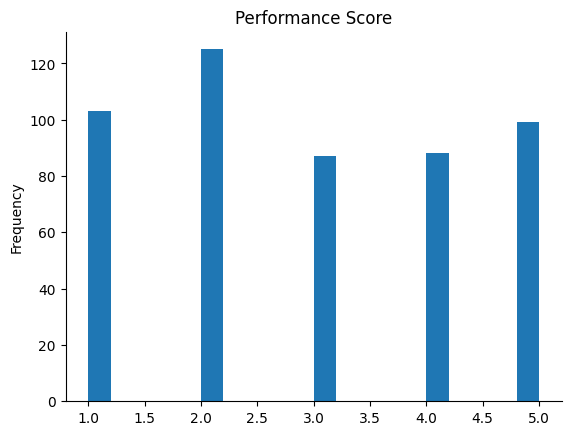

In [8]:
# @title Performance Score

from matplotlib import pyplot as plt
employee_performance['performance_score'].plot(kind='hist', bins=20, title='Performance Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
median_score = employee_performance['performance_score'].median()
print(median_score)

3.0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
employee_performance['performance_score'] = employee_performance['performance_score'].fillna(median_score).round(1)
print(employee_performance.head(10))

   id                name  age  gender department  salary joining_date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   
5   6         Ashley Howe   29  Female         HR    2591   2016-06-24   
6   7         David Olson   39  Female      Sales    6826   2023-05-11   
7   8        Amanda Baker   52   Other         HR    6285   2015-04-01   
8   9       Jeremy Wright   63  Female      Sales    9862   2024-02-07   
9  10      Brian Faulkner   30    Male         IT    8202   2018-05-26   

   performance_score  experience    status     location  session  
0                2.0          16    Active     New York    Night  
1                2.0          11  Inactive  Los Ang

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Duplicates and empty rows
To ensure data integrity, I checked for duplicate entries using `.duplicated()` and identified completely empty rows with `.isnull().all(axis=1)`. Detecting and quantifying these inconsistencies helped prevent bias and ensured a cleaner dataset for accurate analysis. We can see that there no duplicates or empty rows in the dataset.

In [11]:
duplicates = employee_performance.duplicated()
print(f'Number of duplicates : {len(employee_performance[duplicates])}')

Number of duplicates : 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
empty_rows = employee_performance[employee_performance.isnull().all(axis=1)]
print(f'Number of empty rows : {len(empty_rows)}')


Number of empty rows : 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Status column updated
To refine the dataset, I updated the **Status** column for employees over the age of 60, replacing 'Inactive' with 'Retired'. This adjustment ensures a more accurate representation of employment status, aligning with real-world workforce classifications.

In [13]:
employee_performance.loc[employee_performance['age'] > 60, 'status'] = 'Retired'
employee_performance.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,3.0,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening
6,7,David Olson,39,Female,Sales,6826,2023-05-11,3.0,4,Active,New York,Night
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,3.0,8,Inactive,Chicago,Evening
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,3.0,3,Retired,New York,Night
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning


In [14]:
# filter the column Status and only display the the rows 'Retired'
retired_employees = employee_performance[employee_performance['status'] == 'Retired']
display(retired_employees)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,3.0,3,Retired,New York,Night
12,13,Joshua Robinson,61,Male,IT,5688,2020-06-21,3.0,4,Retired,Chicago,Night
15,16,Gary Cooley,62,Male,HR,5386,2017-07-25,3.0,2,Retired,Chicago,Morning
21,22,Stacie Porter,61,Female,HR,4071,2020-05-04,2.0,9,Retired,Chicago,Night
28,29,Vickie Campbell,65,Female,IT,9190,2019-10-28,3.0,12,Retired,Chicago,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
960,961,Charlene Nelson,63,Other,Sales,4954,2021-11-22,1.0,15,Retired,New York,Night
962,963,Matthew Rowe,65,Female,Sales,6788,2024-01-22,4.0,6,Retired,New York,Evening
965,966,Edgar Herrera MD,65,Female,HR,2959,2019-06-26,3.0,2,Retired,Los Angeles,Evening
968,969,Nicholas Edwards,65,Other,Sales,8928,2020-04-05,1.0,6,Retired,Chicago,Evening


# **Analysis of Employee Performance Score Distribution**

To analyze the distribution of employee performance, I calculated the percentage of each **Performance Score** category and visualized it using a pie chart. This provides a clear understanding of how performance scores are distributed across employees, helping to identify trends or imbalances in evaluations.

In [15]:
# Distribution of the performance score
performance_distribution = employee_performance['performance_score'].value_counts(normalize=True) * 100
print(performance_distribution)


performance_score
3.0    58.5
2.0    12.5
1.0    10.3
5.0     9.9
4.0     8.8
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def performance_category (row) :
  if row['performance_score'] <= 2.0 :
    return 'Low Performer'
  elif row['performance_score'] <= 3.0 :
    return 'Average Performer'
  else :
    return 'High Performer'

employee_performance['performance_category'] = employee_performance.apply(performance_category, axis=1)
employee_performance.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session,performance_category
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night,Low Performer
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening,Low Performer
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,3.0,1,Inactive,New York,Morning,Average Performer
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening,Low Performer
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening,High Performer
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening,Low Performer
6,7,David Olson,39,Female,Sales,6826,2023-05-11,3.0,4,Active,New York,Night,Average Performer
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,3.0,8,Inactive,Chicago,Evening,Average Performer
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,3.0,3,Retired,New York,Night,Average Performer
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning,Low Performer


In [17]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


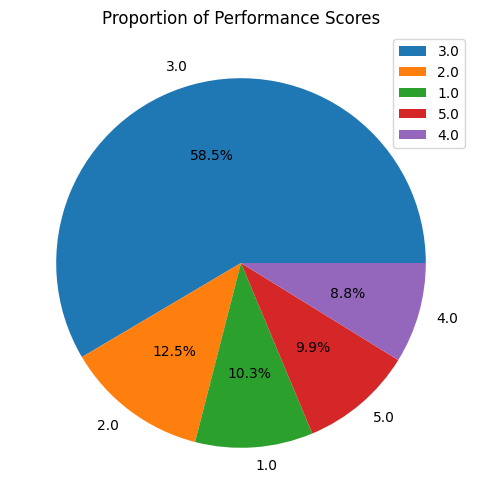

In [18]:
# Pie Chart
plt.figure(figsize=(8, 6))
performance_distribution.plot(kind='pie',autopct='%1.1f%%', legend=True)
plt.title("Proportion of Performance Scores")
plt.ylabel("")
plt.show()

Based on the pie chart, we can conclude that the majority of employees have a **Performance Score** of 3.0, comprising 58.5% of the dataset. This indicates a significant clustering around the average performance level. However, smaller proportions of employees fall into the higher (4.0 and 5.0) or lower (1.0 and 2.0) performance categories, with notably fewer employees achieving the highest score of 5.0. These insights highlight opportunities to investigate factors contributing to both high and low performance, as well as to develop strategies to elevate more employees toward the upper end of the performance scale.

##**Department insights**

Creating a dictionary of department insights is relevant because it provides a structured way to store and analyze key metrics, such as average salary and performance scores, for each department. This centralized approach simplifies comparisons across departments, helps identify areas needing improvement (low performance), and highlights successful teams as benchmarks. By organizing this data efficiently, the dictionary enables informed, data-driven decisions and supports advanced analysis or visualizations for deeper insights.

In [19]:
# The average of Salary for each department
department_salary = employee_performance.groupby('department')['salary'].mean().round(1)
department_salary = department_salary.sort_values(ascending=False).reset_index()
print(department_salary)

  department  salary
0         HR  5982.4
1         IT  5968.4
2      Sales  5804.1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# The number of employees for each department
department_count = employee_performance.groupby('department').size()
department_count = department_count.reset_index(name= 'employee_count')
print(department_count)

  department  employee_count
0         HR             323
1         IT             339
2      Sales             338


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# The average performance score for each department
department_performance = employee_performance.groupby('department')['performance_score'].mean().round(1)
department_performance = department_performance.sort_values(ascending=False).reset_index()
print(department_performance)

  department  performance_score
0         IT                3.0
1         HR                2.9
2      Sales                2.9


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# The percentage of 'Active' for each department
department_status = employee_performance.groupby('department')['status'].value_counts(normalize=True) * 100.
department_status = department_status.unstack().astype(int)
department_status

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


status,Active,Inactive,Retired
department,,,
HR,44,45,9
IT,43,46,9
Sales,42,44,12


In [23]:
# A dictionnary that shows the insights about each department
department_insights = {
    "HR": {
        "Average Salary": 5982.4,
        "Number of Employees": 323,
        "Average Performance Score": 2.9,
        "Active Percentage": '44%',
        "Inactive Percentage": '45%',
        "Retired Percentage": '9%'
    },
    "IT": {
        "Average Salary": 5968.4 ,
        "Number of Employees": 339,
        "Average Performance Score": 3.0,
        "Active Percentage": '43%',
        "Inactive Percentage": '46%',
        "Retired Percentage": '9%'
    },
    "Sales": {
        "Average Salary": 5804.1,
        "Number of Employees": 338,
        "Average Performance Score": 2.9,
        "Active Percentage": '42%',
        "Inactive Percentage": '44%',
        "Retired Percentage": '12%'
    }

}
department_insights

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'HR': {'Average Salary': 5982.4,
  'Number of Employees': 323,
  'Average Performance Score': 2.9,
  'Active Percentage': '44%',
  'Inactive Percentage': '45%',
  'Retired Percentage': '9%'},
 'IT': {'Average Salary': 5968.4,
  'Number of Employees': 339,
  'Average Performance Score': 3.0,
  'Active Percentage': '43%',
  'Inactive Percentage': '46%',
  'Retired Percentage': '9%'},
 'Sales': {'Average Salary': 5804.1,
  'Number of Employees': 338,
  'Average Performance Score': 2.9,
  'Active Percentage': '42%',
  'Inactive Percentage': '44%',
  'Retired Percentage': '12%'}}

To analyze salary distribution and performance trends across departments, I extracted department names along with their corresponding average salaries and performance scores from the `department_insights` dictionary. I then visualized these metrics using bar charts: the first chart displayed the average salary for each department, highlighting salary variations across different teams, while the second chart illustrated the average performance scores per department, providing insights into departmental performance trends. These visualizations help identify disparities in compensation and performance, offering valuable insights for strategic workforce planning.

In [24]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
departments = list(department_insights.keys())
avg_salaries = [department_insights[d]['Average Salary'] for d in departments]
avg_performance = [department_insights[d]['Average Performance Score'] for d in departments]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


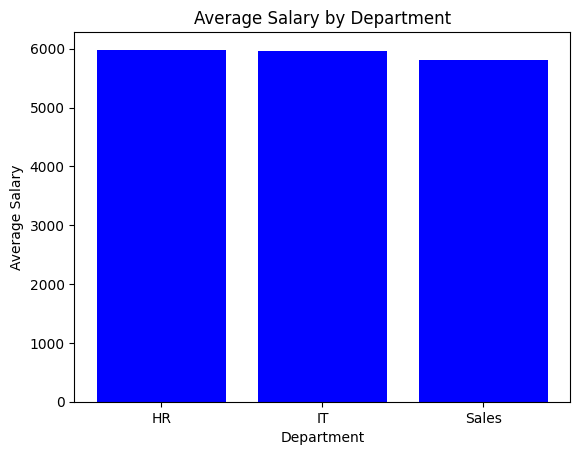

In [26]:
# Bar chart of the average salaries by department
plt.bar(departments, avg_salaries, color='blue')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


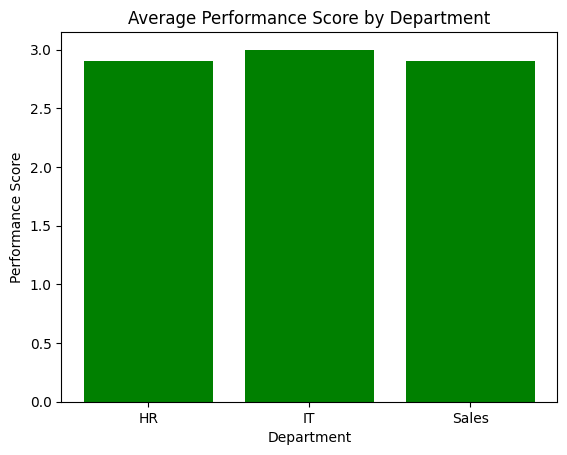

In [27]:
# Bar chart of the average performance scores by department
plt.bar(departments, avg_performance, color='green')
plt.title("Average Performance Score by Department")
plt.xlabel("Department")
plt.ylabel("Performance Score")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


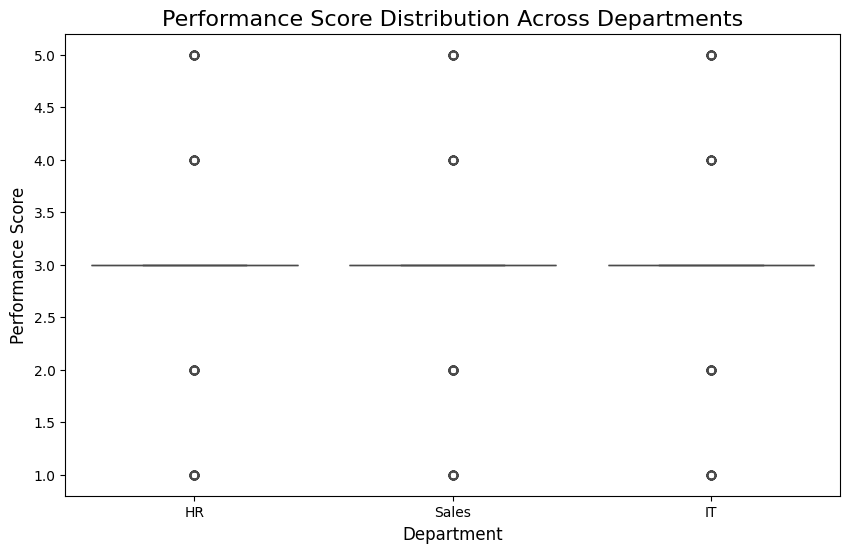

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='performance_score', data=employee_performance, color='steelblue')

plt.title("Performance Score Distribution Across Departments", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Performance Score", fontsize=12)
plt.xticks(rotation=0)
plt.show()

The box plot visualization highlights the distribution of performance scores across the HR, Sales, and IT departments, with all departments exhibiting a median score close to 3.0. This indicates that most employees are performing at an average level. Outliers are present in each department, representing employees with either extremely low (1.0) or high (5.0) performance scores, which warrant further investigation—low performers may need additional support, while high performers could be standout contributors. However, since the performance scores are similar across departments, the visualization primarily confirms uniformity rather than providing actionable insights for performance improvement. This chart is useful for identifying trends in consistency and highlighting outliers, but deeper analysis of factors like salary or experience would be needed for more actionable conclusions.

## Analyzing Performance Score Distribution and Salary-Performance Relationships


To assess the distribution of performance scores across departments, I created a box plot using Seaborn, which visually represents the spread and variability of performance scores for each department. This helps identify departments with consistent performance and those with high variability. Additionally, I filtered employees based on their salary relative to the average. Using an `if` function, I categorized employees into two groups: those earning above and below the mean salary. From these groups, I further identified employees with low performance scores (below 2), distinguishing between high-salary low performers and low-salary low performers. This analysis provides insights into salary-performance relationships and potential inefficiencies in compensation structures.

In [29]:
# Employees with a salary greater than the mean

mean_salary = employee_performance['salary'].mean()

filtered_employees = []
for index, row in employee_performance.iterrows():
    if row['salary'] > mean_salary:
        filtered_employees.append(row)

filtered_employees = pd.DataFrame(filtered_employees)
filtered_employees.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session,performance_category
6,7,David Olson,39,Female,Sales,6826,2023-05-11,3.0,4,Active,New York,Night,Average Performer
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,3.0,8,Inactive,Chicago,Evening,Average Performer
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,3.0,3,Retired,New York,Night,Average Performer
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning,Low Performer
11,12,Rodney Richardson,60,Other,HR,6908,2015-03-14,4.0,19,Active,Chicago,Night,High Performer
14,15,Matthew Collins MD,31,Female,Sales,8568,2020-06-01,3.0,20,Inactive,Los Angeles,Evening,Average Performer
16,17,Jonathan Perez,59,Male,HR,6586,2019-02-19,3.0,7,Inactive,Los Angeles,Evening,Average Performer
18,19,Nancy Stephens,38,Male,HR,9061,2017-07-16,5.0,16,Inactive,Chicago,Night,High Performer
19,20,Victoria Fox,57,Female,HR,7251,2023-06-07,3.0,10,Active,Los Angeles,Evening,Average Performer
22,23,Bryce Carter,35,Female,Sales,9598,2015-12-16,4.0,4,Inactive,New York,Night,High Performer


In [30]:
len(filtered_employees)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


498

In [31]:
# Employees with high salary but a low performance score (<2)
low_performers_high_salary = filtered_employees[filtered_employees['performance_score'] < 2]
low_performers_high_salary

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session,performance_category
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning,Low Performer
35,36,Kevin Watts,35,Male,IT,9078,2019-06-12,1.0,7,Inactive,Los Angeles,Evening,Low Performer
74,75,Francisco Jones,18,Female,Sales,8622,2023-07-01,1.0,13,Inactive,Chicago,Evening,Low Performer
88,89,Jessica Sanders,41,Male,HR,6828,2024-08-02,1.0,10,Inactive,Chicago,Night,Low Performer
149,150,Robert Adkins,28,Female,Sales,8198,2020-10-23,1.0,15,Inactive,New York,Evening,Low Performer
165,166,Caleb Coffey,49,Other,HR,6194,2024-05-12,1.0,19,Inactive,New York,Evening,Low Performer
198,199,Jennifer Brown DVM,51,Male,HR,7908,2023-04-14,1.0,2,Inactive,Chicago,Evening,Low Performer
217,218,Jeffery Hurley,25,Male,IT,7335,2017-11-05,1.0,3,Active,Los Angeles,Night,Low Performer
232,233,Michelle Mendez,50,Male,IT,8718,2024-07-17,1.0,18,Active,Chicago,Morning,Low Performer
241,242,Jennifer Wilson,54,Male,HR,9516,2021-10-19,1.0,8,Inactive,Chicago,Night,Low Performer


In [32]:
len(low_performers_high_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


56

In [33]:
# Employees with a salary lower that the average salary
filtered_employees_low_salary = []
for index, row in employee_performance.iterrows():
    if row['salary'] < mean_salary:
        filtered_employees_low_salary.append(row)

filtered_employees_low_salary = pd.DataFrame(filtered_employees_low_salary)
filtered_employees_low_salary.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session,performance_category
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night,Low Performer
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening,Low Performer
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,3.0,1,Inactive,New York,Morning,Average Performer
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening,Low Performer
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening,High Performer
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening,Low Performer
10,11,Nicole Bell,42,Female,Sales,5336,2015-01-28,3.0,7,Active,Los Angeles,Evening,Average Performer
12,13,Joshua Robinson,61,Male,IT,5688,2020-06-21,3.0,4,Retired,Chicago,Night,Average Performer
13,14,Benjamin Callahan,34,Male,IT,5593,2019-06-23,3.0,2,Inactive,Los Angeles,Night,Average Performer
15,16,Gary Cooley,62,Male,HR,5386,2017-07-25,3.0,2,Retired,Chicago,Morning,Average Performer


In [34]:
len(filtered_employees_low_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


502

In [35]:
# Employees with low salary and a low performance score (<2)
low_performers_low_salary = filtered_employees_low_salary[filtered_employees_low_salary['performance_score'] < 2]
low_performers_low_salary

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,age,gender,department,salary,joining_date,performance_score,experience,status,location,session,performance_category
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening,Low Performer
30,31,Brandi Smith,21,Other,IT,4780,2020-01-20,1.0,7,Inactive,New York,Night,Low Performer
33,34,Mr. Brian Nelson,42,Female,IT,5207,2017-08-17,1.0,4,Active,Los Angeles,Night,Low Performer
36,37,Jacqueline Moore,39,Male,Sales,2364,2018-02-25,1.0,15,Active,Los Angeles,Evening,Low Performer
37,38,Lawrence Rose,18,Female,HR,2904,2021-04-11,1.0,17,Inactive,Chicago,Night,Low Performer
76,77,Victor Nelson,47,Female,Sales,2025,2015-05-14,1.0,5,Active,New York,Night,Low Performer
90,91,Kyle Schwartz,31,Male,HR,3488,2023-03-16,1.0,3,Active,New York,Morning,Low Performer
92,93,Peter Moore,38,Other,Sales,4897,2021-03-13,1.0,4,Inactive,Chicago,Morning,Low Performer
144,145,Kimberly Murphy,25,Other,HR,3003,2019-05-14,1.0,19,Active,New York,Morning,Low Performer
156,157,Pamela Pierce,43,Female,HR,4710,2021-06-26,1.0,16,Active,New York,Night,Low Performer


In [36]:
len(low_performers_low_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


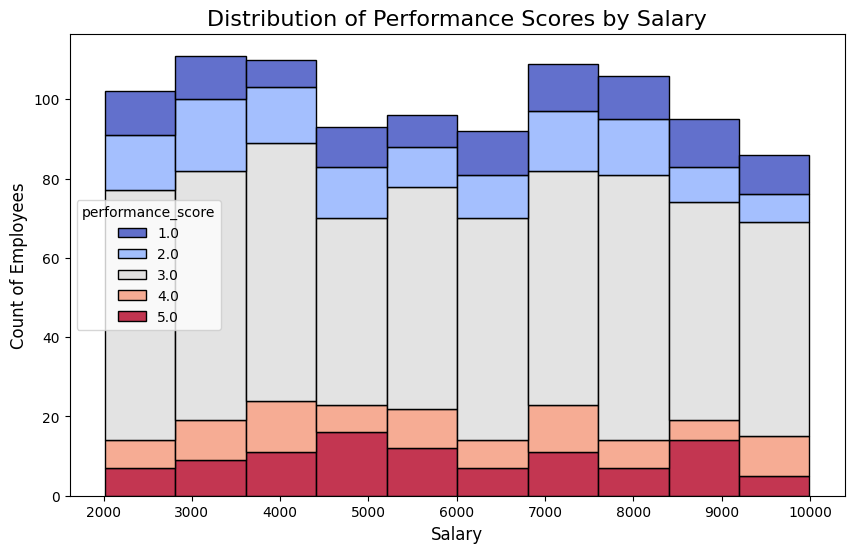

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=employee_performance, x='salary', hue='performance_score', multiple='stack', bins=10, palette='coolwarm', alpha=0.8)
plt.title("Distribution of Performance Scores by Salary", fontsize=16)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Count of Employees", fontsize=12)
plt.show()

The analysis reveals a positive correlation between salary and performance, with high-performing employees predominantly found in higher salary ranges, suggesting that increased compensation may motivate better performance or reflect higher skill levels. However, a small proportion of low-performing employees also exist in high salary groups, highlighting potential inefficiencies in salary allocation or mismatches in role expectations. Overlaps of performance scores in mid-range salary bins suggest that salary alone is not the sole determinant of performance, pointing to the importance of non-monetary factors like training and role alignment. Furthermore, the skew toward lower salary ranges raises concerns about retaining high performers in these groups, emphasizing the need for targeted compensation adjustments and performance-focused incentives. This analysis underscores the value of refining salary structures and addressing non-salary factors to enhance employee performance and retention.

## Performance Score Trends Across Work Sessions

Based on the descriptive statistics and the box plot visualization, we observe that the **performance scores** are fairly consistent across work sessions (Morning, Evening, Night), with all sessions showing similar median scores around 3.0. However, the box plot highlights some variability, with **Morning sessions** having slightly more outliers at the lower end of the performance scale, suggesting that some employees may struggle during this time. The **Evening and Night sessions** show more concentrated performance distributions, indicating greater consistency among employees during these shifts. These insights suggest that while overall performance is uniform, the **Morning session** may require further investigation to identify factors impacting lower performers, such as workload or individual preferences.

In [38]:
# Group by session
session_order = ['Morning', 'Evening', 'Night']
session_performance = employee_performance.groupby('session')['performance_score'].agg(['mean', 'median','count']).reindex(session_order)
session_performance

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean,median,count
session,,,
Morning,2.958084,3.0,334
Evening,2.990798,3.0,326
Night,2.917647,3.0,340


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


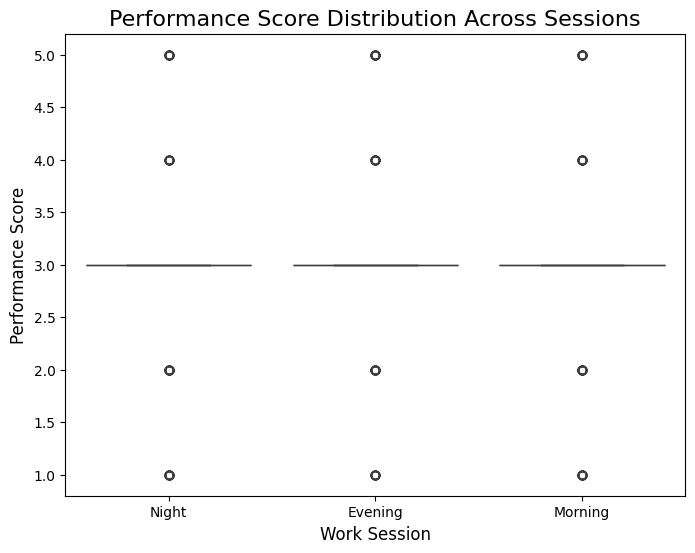

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='session', y='performance_score', data=employee_performance)
plt.title("Performance Score Distribution Across Sessions", fontsize=16)
plt.xlabel("Work Session", fontsize=12)
plt.ylabel("Performance Score", fontsize=12)
plt.show()

#**SQLAlchemy**

The employee performance dataset was first loaded into a pandas DataFrame and inspected to ensure readiness for processing. Using SQLAlchemy, a SQLite database (`employee_performance.db`) was set up, and an engine was created to enable interaction with the database. Column names were standardized by removing extra spaces and replacing them with underscores to ensure compatibility with SQL naming conventions. The cleaned dataset was then inserted into the database, replacing any existing data to maintain an updated record. Finally, the data was retrieved from the database to confirm successful storage and validate its structure.

In [40]:
import pandas as pd
print(employee_performance.head())

   id                name  age  gender department  salary joining_date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   

   performance_score  experience    status     location  session  \
0                2.0          16    Active     New York    Night   
1                2.0          11  Inactive  Los Angeles  Evening   
2                3.0           1  Inactive     New York  Morning   
3                2.0          13  Inactive  Los Angeles  Evening   
4                5.0          16  Inactive     New York  Evening   

  performance_category  
0        Low Performer  
1        Low Performer  
2    Average Performer  
3        Low Performer  
4       High Performe

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
import pandas as pd
from sqlalchemy import create_engine

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
db_path = ('employee_performance.db')
db_url = f'sqlite:///{db_path}'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
 engine = create_engine(db_url)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
employee_performance.columns = [col.strip().replace(' ', '_')
for col in employee_performance.columns]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# processed data into the database
with engine.connect() as conn:
    employee_performance.to_sql(
        'employee_performance', conn,
        if_exists='replace',
        index=False)
    query = "SELECT * FROM employee_performance"
    employee_performance_from_db = pd.read_sql(query, conn)
    print(employee_performance_from_db.head(10))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   id                name  age  gender department  salary joining_date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   
5   6         Ashley Howe   29  Female         HR    2591   2016-06-24   
6   7         David Olson   39  Female      Sales    6826   2023-05-11   
7   8        Amanda Baker   52   Other         HR    6285   2015-04-01   
8   9       Jeremy Wright   63  Female      Sales    9862   2024-02-07   
9  10      Brian Faulkner   30    Male         IT    8202   2018-05-26   

   performance_score  experience    status     location  session  \
0                2.0          16    Active     New York    Night   
1                2.0          11  Inactive  Los A

**Query the database**

In [46]:
# Top 10 highest-paid employees
query = "SELECT * FROM employee_performance ORDER BY Salary DESC LIMIT 10"
top_10_highest_paid = pd.read_sql(query, engine)
print(top_10_highest_paid)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    id                name  age  gender department  salary joining_date  \
0  812        Jesse Miller   52    Male         HR    9993   2020-11-27   
1  532  Jeffrey Williamson   54   Other         IT    9988   2015-12-08   
2  990       Shannon Meyer   18   Other         HR    9985   2022-11-05   
3  128     Ashley Williams   65  Female         HR    9973   2020-05-03   
4  938       Gary Mitchell   52  Female      Sales    9963   2016-09-22   
5  909       Sara Martinez   34   Other         HR    9951   2024-02-18   
6  458          Emma Pratt   19   Other         IT    9946   2016-04-08   
7  121       David Hampton   39  Female         HR    9941   2024-07-06   
8  201   Mr. James Johnson   48  Female         HR    9930   2019-08-04   
9  797       Jacob Shannon   35   Other      Sales    9926   2016-09-04   

   performance_score  experience    status     location  session  \
0                3.0          12    Active      Chicago  Evening   
1                3.0          16  Inac

In [47]:
# Employees with the highest performance score
query = "SELECT * FROM employee_performance ORDER BY Performance_Score DESC LIMIT 10"
top_10_highest_performance = pd.read_sql(query, engine)
print(top_10_highest_performance)

    id                name  age  gender department  salary joining_date  \
0    5        Amber Harris   35   Other         IT    4317   2020-02-15   
1   19      Nancy Stephens   38    Male         HR    9061   2017-07-16   
2   26      Tara Blackwell   30   Other         HR    6120   2020-02-20   
3   27         Austin Long   20  Female         IT    4899   2024-05-01   
4   39        Jordan Scott   33   Other      Sales    8678   2016-05-15   
5   54      Taylor Griffin   62   Other      Sales    5721   2019-01-07   
6   60       Melinda Tyler   19   Other      Sales    5937   2021-04-12   
7  104         Jose Henson   32    Male         HR    6458   2023-03-25   
8  105  Isaiah Sanders DDS   31  Female         HR    2752   2021-04-28   
9  108        Sandra Allen   24    Male         IT    2578   2019-01-05   

   performance_score  experience    status     location  session  \
0                5.0          16  Inactive     New York  Evening   
1                5.0          16  Inac

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Average performance score by department
query = "SELECT Department, AVG(Performance_Score) AS Avg_Performance FROM employee_performance GROUP BY Department"
avg_performance_by_department = pd.read_sql(query, engine)
print(avg_performance_by_department)

  department  Avg_Performance
0         HR         2.925697
1         IT         2.988201
2      Sales         2.949704


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Count employees by gender
query = "SELECT Gender, COUNT(*) AS Employee_Count FROM employee_performance GROUP BY Gender"
employee_count_by_gender = pd.read_sql(query, engine)
print(employee_count_by_gender)

   gender  Employee_Count
0  Female             332
1    Male             328
2   Other             340


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Active employees situated in Chicago
query = "SELECT * FROM employee_performance WHERE Status = 'Active' AND Location = 'Chicago'"
active_chicago_employees = pd.read_sql(query, engine)
print(active_chicago_employees)

      id               name  age  gender department  salary joining_date  \
0      6        Ashley Howe   29  Female         HR    2591   2016-06-24   
1     12  Rodney Richardson   60   Other         HR    6908   2015-03-14   
2     21      Heather Jones   35    Male      Sales    4565   2018-02-07   
3     51      Jamie Gregory   27   Other      Sales    3253   2015-12-07   
4     62      Carmen Taylor   33    Male      Sales    2851   2023-01-30   
..   ...                ...  ...     ...        ...     ...          ...   
141  967     Andres Barnett   50  Female         HR    2736   2024-08-25   
142  980   Crystal Espinoza   55  Female         IT    4952   2023-09-04   
143  988     Danielle Brown   31  Female         IT    5605   2024-06-28   
144  990      Shannon Meyer   18   Other         HR    9985   2022-11-05   
145  991       Amy Johnston   53  Female         HR    3991   2024-09-03   

     performance_score  experience  status location  session  \
0                  1.0 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
#Count of Employees with High Performance by Location
query = "SELECT Location, COUNT(*) AS High_Performance_Count FROM employee_performance WHERE Performance_Score >= 4 GROUP BY Location"
high_performance_by_location = pd.read_sql(query, engine)
print(high_performance_by_location)

      location  High_Performance_Count
0      Chicago                      66
1  Los Angeles                      63
2     New York                      58


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
#Employees with Low Performance and High Salary
query = "SELECT * FROM employee_performance WHERE Performance_Score < 3 AND Salary > 6000"
low_performance_high_salary = pd.read_sql(query, engine)
print(low_performance_high_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       id              name  age  gender department  salary joining_date  \
0      10    Brian Faulkner   30    Male         IT    8202   2018-05-26   
1      30     Rachel Ramsey   22    Male      Sales    9661   2016-08-18   
2      36       Kevin Watts   35    Male         IT    9078   2019-06-12   
3      53     Steve Salinas   42   Other      Sales    6567   2022-03-26   
4      68      Denise Smith   27    Male         HR    6921   2024-10-31   
..    ...               ...  ...     ...        ...     ...          ...   
107   959    Morgan Coleman   51  Female         HR    6415   2022-03-20   
108   969  Nicholas Edwards   65   Other      Sales    8928   2020-04-05   
109   986   Regina Ferguson   62   Other         HR    8555   2017-04-21   
110   987   Melissa Bradley   39  Female         IT    9618   2015-07-05   
111  1000       Shawn Scott   45    Male         IT    7364   2022-07-31   

     performance_score  experience    status     location  session  \
0                

In [53]:
# Employees with both high performance scores and a long experience
query = "SELECT * FROM employee_performance WHERE performance_score >= 4 AND experience > 10"
high_performance_long_experience = pd.read_sql(query, engine)
print(high_performance_long_experience)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     id               name  age  gender department  salary joining_date  \
0     5       Amber Harris   35   Other         IT    4317   2020-02-15   
1    12  Rodney Richardson   60   Other         HR    6908   2015-03-14   
2    19     Nancy Stephens   38    Male         HR    9061   2017-07-16   
3    25      Tracy Carlson   21    Male         HR    9275   2022-04-09   
4    35           Lisa Fry   51  Female         IT    9259   2017-09-26   
..  ...                ...  ...     ...        ...     ...          ...   
77  954       Ruth Osborne   53    Male         HR    5616   2022-07-31   
78  973      James Mendoza   23   Other      Sales    6871   2016-04-11   
79  977      Kimberly Ross   19    Male      Sales    9331   2018-07-03   
80  990      Shannon Meyer   18   Other         HR    9985   2022-11-05   
81  994      Brandon Bruce   31  Female         HR    3371   2018-09-25   

    performance_score  experience    status     location  session  \
0                 5.0         

In [54]:
# Average performance scores group by working sessions
query = "SELECT session, AVG(performance_score) AS Avg_Performance FROM employee_performance GROUP BY session"
performance_by_session = pd.read_sql(query, engine)
print(performance_by_session)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   session  Avg_Performance
0  Evening         2.990798
1  Morning         2.958084
2    Night         2.917647


# **Conclusion and recommendations**

The analysis of employee performance and related factors reveals several key insights and actionable recommendations. The majority of employees scored a 3.0 in performance, indicating an average level of performance across the workforce, with fewer high performers (5.0) and low performers (1.0 and 2.0). Departments such as HR, Sales, and IT showed consistent median performance scores, though outliers highlight variability that warrants further investigation. Work sessions, particularly the Morning shift, revealed slightly more low performers, suggesting potential challenges with timing or preferences. Salary analysis uncovered discrepancies, with some low-performing employees earning above-average salaries and high performers earning below-average salaries, underscoring the need for a review of salary structures and performance-linked incentives. Addressing these issues involves implementing tailored training programs for departments with performance variability, personalized improvement plans for low performers, and equitable compensation structures aligned with performance. Additionally, investigating outliers and enhancing data collection practices can ensure comprehensive evaluations and informed decision-making. These actions will enhance workforce efficiency, employee satisfaction, and organizational productivity.